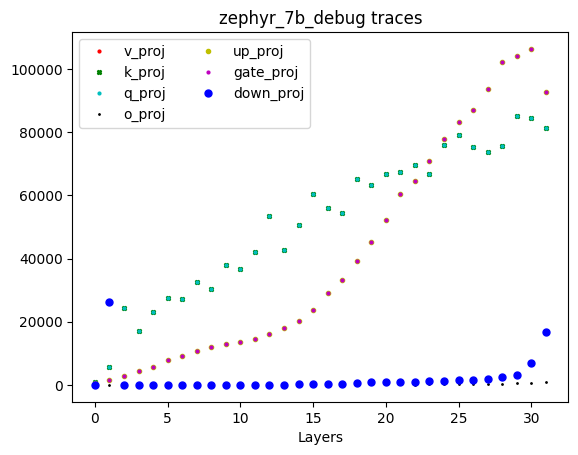

In [105]:
########################################
###### OUT OUT OUT  ####################
########################################
import json
import matplotlib.pyplot as plt
# import matplotlib
# matplotlib.use('Qt5Agg')
import numpy as np

# s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/stable-zephyr-3b-dpo/fp16/traces_per_node_OUT2.json'
# exp_name = 'stable_zephyr_OUT2'

# s='/home/devuser/nlyalyus/projects/lm-evaluation-harness/traces_per_node_llama_OUT2.json'
# exp_name = 'llama_OUT2'

# s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/errors_per_node_llama.json'
# exp_name = 'llama_baseline'

# s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/traces_per_node_stable_zephyr_OUT3_g64_nozp.json'
# exp_name = 'stable_zephyr_OUT3_g64_nozp'

# s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/traces_per_node_stable_zephyr_OUT4_fp32.json'
# exp_name = 'stable_zephyr_OUT4_fp32'

# s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/traces_per_node_stable_zephyr_OUT6_fp32.json'
# exp_name = 'stable_zephyr_OUT6_fp32'

# s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/traces_per_node_stable_zephyr_OUT5_fp32.json'
# exp_name = 'stable_zephyr_OUT5_fp32'

# s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/traces_per_node_stable_zephyr_OUT5_g64_nozp.json'
# exp_name = 'stable_zephyr_OUT5_g64_nozp'

# s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/traces_per_node_stable_zephyr_OUT3_g64.json'
# exp_name = 'stable_zephyr_OUT3_g64'

# s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/errors_per_node_stable_zephyr.json'
# exp_name = 'zephyr_stable_baseline'

# s='/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/Llama-2-7b-chat-hf/fp16/traces_per_node.json'
s= '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/zephyr-7b-beta/fp16/traces_per_node_zephyr7b.json'
exp_name = 'zephyr_7b_debug'
# s ='/home/devuser/nlyalyus/projects/lm-evaluation-harness/traces_per_node.json'


fig, ax = plt.subplots()
ax.set_title(f'{exp_name} traces')
ax.set_xlabel('Layers')

with open(s) as f:
    j = json.load(f)
    traces = list(j.values())
    names = list(j.keys())

color_map = {
    'v_proj': ('r', 'o', 2),
    'k_proj': ('g', 'X', 3),
    'q_proj': ('c', 'o', 2),
    'o_proj': ('k', 'o', 1),
    'up_proj': ('y', 'o', 3),
    'gate_proj': ('m', 'o', 2),
    'down_proj': ('b', 'o', 5),
}

for name, (color, marker, size) in color_map.items():
    traces = dict(filter(lambda p: name in p[0], j.items())).values()
    ax.plot(traces, linestyle="", marker=marker, markersize=size, color=color, label=name)
# plt.yscale('log')
ax.legend(loc='upper left', ncols=2)

# plt.ylim([1018, 1024])
# plt.show()
plt.savefig(f"traces_points_{exp_name}.png")

In [24]:
import numpy as np
inp = np.random.sample((4,10))
m = np.multiply(inp, inp)
m.shape


(4, 10)

In [25]:
s = np.sum(np.multiply(inp, inp), axis=1)
s

array([3.46346225, 2.5080869 , 6.40734747, 2.04141969])

In [33]:
n = int(s.size * 0.1) + 1
n

1

In [34]:

np.sort(s)[::-1][:n]

array([6.40734747])

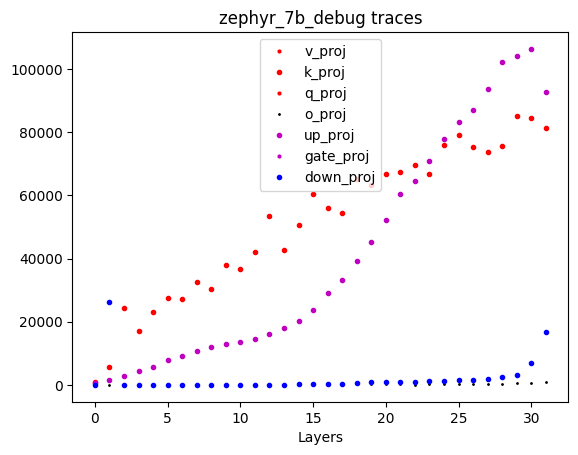

In [106]:
########################################
###### IN IN IN IN IN IN ###############
########################################
import json
import matplotlib.pyplot as plt
import numpy as np

# exp_name = 'stable_zephyr_IN1'
# exp_name = 'llama_IN1'

# s='/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/Llama-2-7b-chat-hf/fp16/traces_per_node.json'
# s= '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/zephyr-7b-beta/fp16/traces_per_node_zephyr7b.json'
# s ='/home/devuser/nlyalyus/projects/lm-evaluation-harness/traces_per_node.json'
# s = '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/stable-zephyr-3b-dpo/fp16/traces_per_node_stable_zephyr.json'
# s= '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/Llama-2-7b-chat-hf/fp16/traces_per_node_llama_IN1.json'
s= '/home/devuser/nlyalyus/projects/lm-evaluation-harness/cache/zephyr-7b-beta/fp16/traces_per_node_zephyr7b.json'
exp_name = 'zephyr_7b_debug'

fig, ax = plt.subplots()
ax.set_title(f'{exp_name} traces')
ax.set_xlabel('Layers')

with open(s) as f:
    j = json.load(f)
    traces = list(j.values())
    names = list(j.keys())

color_map = {
    'v_proj': ('r', 'o', 2),
    'k_proj': ('r', 'o', 3),
    'q_proj': ('r', 'o', 2),
    'o_proj': ('k', 'o', 1),
    'up_proj': ('m', 'o', 3),
    'gate_proj': ('m', 'o', 2),
    'down_proj': ('b', 'o', 3),
}

for name, (color, marker, size) in color_map.items():
    traces = dict(filter(lambda p: name in p[0], j.items())).values()
    ax.plot(traces, linestyle="", marker=marker, markersize=size, color=color, label=name)
ax.legend(loc='upper center', ncols=1)

plt.savefig(f"traces_points_{exp_name}.png")

In [42]:
from difflib import SequenceMatcher
s1 = 'OpenVINO is an open-source software library for deep learning inference that is designed to optimize and run deep learning models on a variety of platforms, including CPUs, GPUs, and specialized accelerators like TPUs. OpenVINO is developed by Intel and is available under the Apache 2.0 license'
s2 = 'OpenVINO is an open-source software platform designed to accelerate the development and deployment of machine learning models. It provides a set of tools and libraries for creating, training, and deploying machine learning models on various hardware platforms, including CPUs, GPUs, and FPGAs. OpenVINO is developed and maintained by Intel, and it is available under the Apache 2.0 license, which means that it is free and open to use for anyone.'
s = SequenceMatcher(None, s1, s2)
mb=s.get_matching_blocks()
mb[0].size


In [43]:
mb

[Match(a=0, b=0, size=36),
 Match(a=36, b=158, size=6),
 Match(a=42, b=201, size=1),
 Match(a=106, b=238, size=1),
 Match(a=145, b=249, size=38),
 Match(a=214, b=288, size=1),
 Match(a=216, b=291, size=25),
 Match(a=241, b=331, size=8),
 Match(a=253, b=347, size=42),
 Match(a=295, b=446, size=0)]